In [1]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
dataset=pd.read_csv("readyToUse.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(4137, 14)

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
1,67,1,0,120,229,0,0,129,1,2.6,1,2,2,0
2,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
3,63,1,0,130,254,0,0,147,0,1.4,1,1,2,0
4,53,1,0,140,203,1,0,155,1,3.1,0,0,2,0


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,53.011603,0.535412,1.473532,133.185158,274.516074,0.477641,0.973652,149.741842,0.537346,2.925622,1.012328,1.450085,1.054146,3.352188
std,13.785219,0.498805,1.120772,25.562767,70.589428,0.499560,0.823102,28.436023,0.498664,1.765797,0.803217,1.128789,0.798311,1.841118
min,29.000000,0.000000,0.000000,90.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,0.000000,110.000000,216.000000,0.000000,0.000000,125.000000,0.000000,1.400000,0.000000,0.000000,0.000000,2.000000
50%,54.000000,1.000000,1.000000,133.000000,271.000000,0.000000,1.000000,150.000000,1.000000,2.800000,1.000000,1.000000,1.000000,3.000000
75%,64.000000,1.000000,3.000000,154.000000,332.000000,1.000000,2.000000,176.000000,1.000000,4.400000,2.000000,2.000000,2.000000,5.000000
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,199.000000,1.000000,6.200000,2.000000,3.000000,2.000000,6.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       4137 non-null   int64  
 1   sex       4137 non-null   int64  
 2   cp        4137 non-null   int64  
 3   trestbps  4137 non-null   int64  
 4   chol      4137 non-null   int64  
 5   fbs       4137 non-null   int64  
 6   restecg   4137 non-null   int64  
 7   thalach   4137 non-null   int64  
 8   exang     4137 non-null   int64  
 9   oldpeak   4137 non-null   float64
 10  slope     4137 non-null   int64  
 11  ca        4137 non-null   int64  
 12  thal      4137 non-null   int64  
 13  target    4137 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 452.6 KB


In [8]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [9]:
dataset["target"].describe()

count    4137.000000
mean        3.352188
std         1.841118
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: target, dtype: float64

In [10]:
dataset["target"].unique()

array([0, 1, 4, 6, 3, 2, 5])

In [11]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
thal        0.090292
cp          0.090229
fbs         0.072574
oldpeak     0.059917
age         0.052070
ca          0.035393
chol        0.025109
trestbps    0.021488
restecg     0.020962
sex         0.017928
exang       0.017095
slope       0.006207
thalach     0.000147
Name: target, dtype: float64


target
1    731
2    729
6    714
5    652
4    613
3    561
0    137
Name: count, dtype: int64


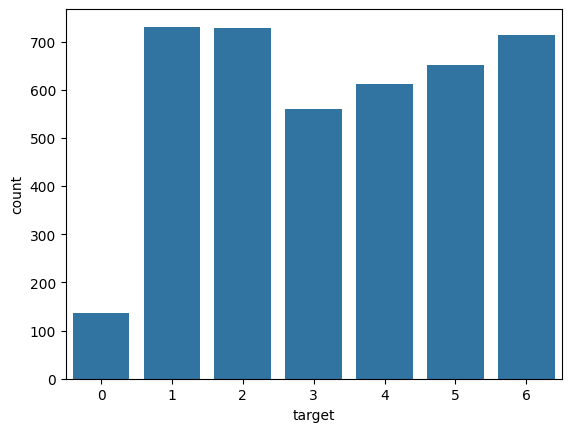

In [12]:
y = dataset["target"]
sns.countplot(data=dataset, x="target") 
target_temp = y.value_counts()
print(target_temp)
plt.show()


In [13]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

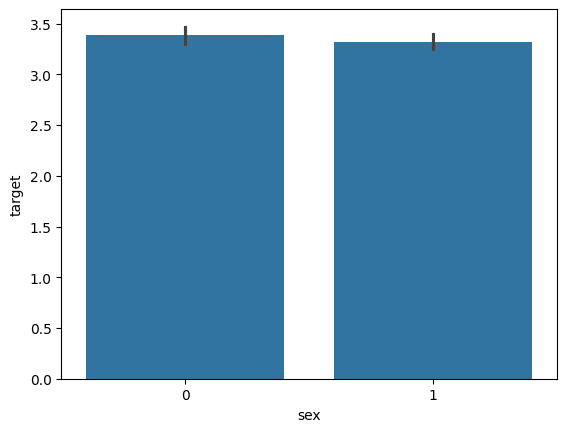

In [14]:
sns.barplot(x="sex", y=y, data=dataset)

In [15]:
dataset["cp"].unique()

array([0, 2, 1, 3])

<Axes: xlabel='cp', ylabel='target'>

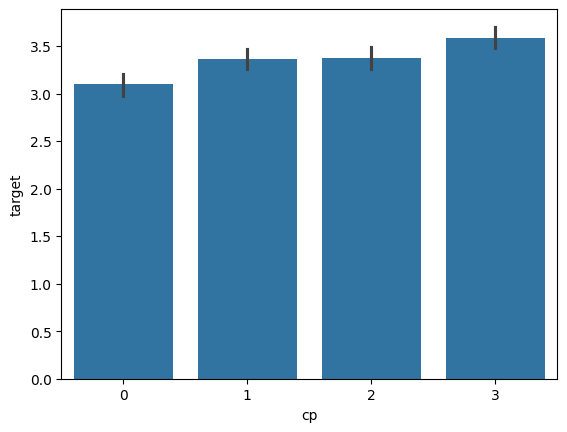

In [16]:

sns.barplot(x="cp", y=y, data=dataset)

In [17]:
dataset["fbs"].describe()

count    4137.000000
mean        0.477641
std         0.499560
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: fbs, dtype: float64

In [18]:
dataset["fbs"].unique()

array([0, 1])

<Axes: xlabel='fbs', ylabel='target'>

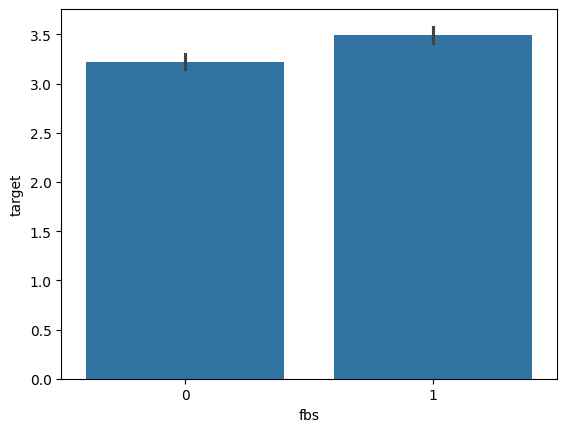

In [19]:
sns.barplot(x="fbs", y=y, data=dataset)

In [20]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

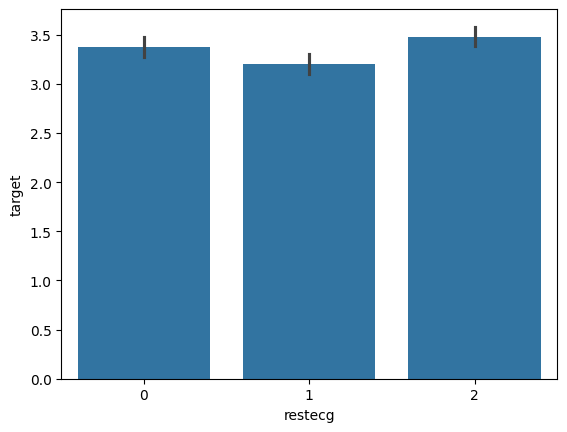

In [21]:
sns.barplot(x="restecg", y=y, data=dataset)

In [22]:
dataset["exang"].unique()

array([1, 0])

<Axes: xlabel='exang', ylabel='target'>

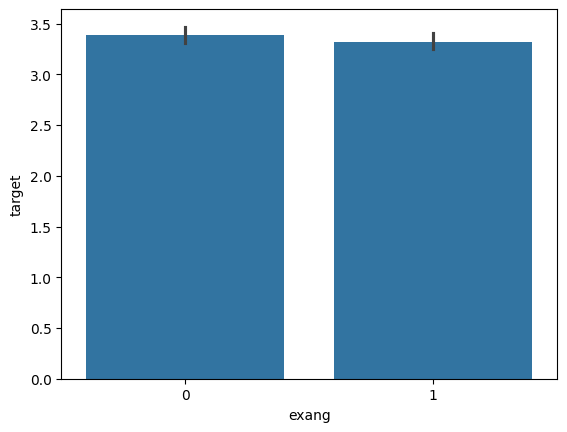

In [23]:
sns.barplot(x="exang", y=y, data=dataset)

In [24]:
dataset["slope"].unique()

array([1, 0, 2])

<Axes: xlabel='slope', ylabel='target'>

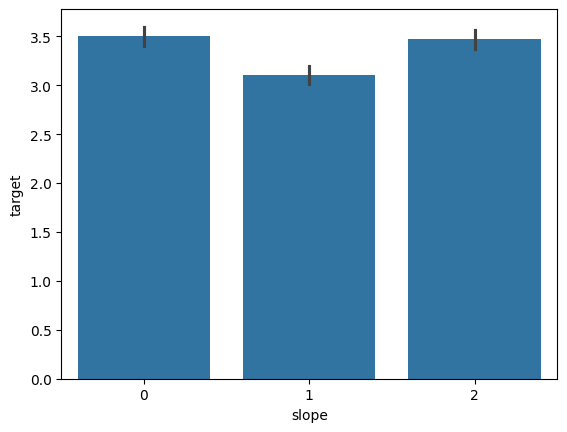

In [25]:
sns.barplot(x="slope", y=y, data=dataset)

In [26]:
dataset["ca"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='ca', ylabel='target'>

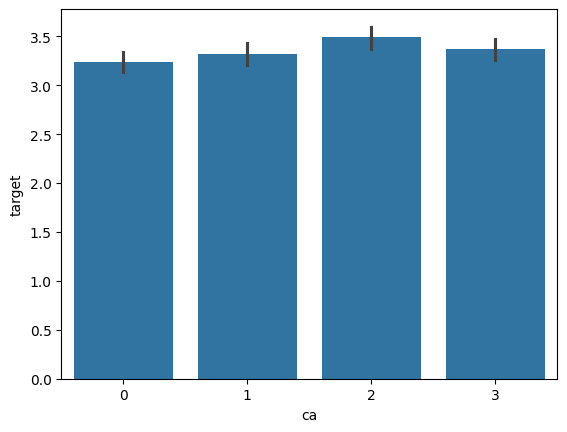

In [27]:
sns.barplot(x="ca", y=y, data=dataset)

In [28]:
dataset["thal"].unique()

array([2, 1, 0])

<Axes: xlabel='thal', ylabel='target'>

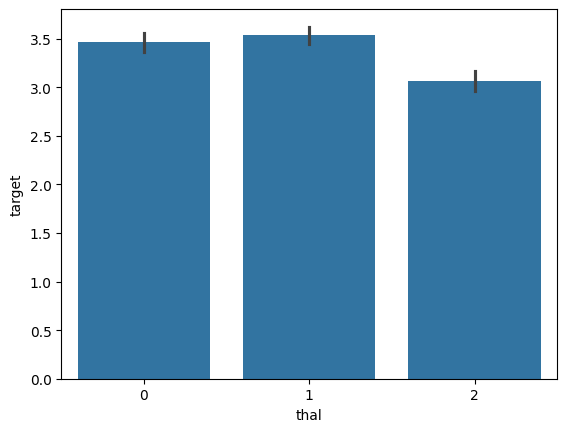

In [29]:
sns.barplot(x="thal", y=y, data=dataset)

In [30]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
X_train.shape

(3309, 13)

In [32]:
X_test.shape

(828, 13)

In [33]:
Y_train.shape

(3309,)

In [34]:
Y_test.shape

(828,)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
%pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
Y_pred_xgb.shape

(828,)

In [38]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 97.1 %


In [39]:
comparison_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': Y_pred_xgb
})
print(comparison_df.sample(20))

      Actual  Predicted
3349       3          3
836        5          5
3530       4          4
3058       6          6
1242       5          5
685        3          6
2359       2          2
1887       6          6
2535       5          5
1601       2          2
1489       1          1
3990       5          5
177        2          2
817        1          1
3789       2          2
1540       1          1
483        5          5
2484       6          6
2111       6          6
4074       3          3


In [40]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [41]:
import pickle
with open('xgboost.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [42]:
import pickle
import xgboost as xgb

# Assuming xgb_model is your trained model
with open('streamlit-app/src/model/xgboost.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)